Will Manley
<br>
COMSC 415
<br>
Project 2

In [598]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.load('C:\\Users\\wwman\\Desktop\\Machine Learning\\Project 2\\sdss_data.npy', allow_pickle = 'True', encoding = 'latin1').item()
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']
feature_names = data['feature_names']
class_labels = data['class_labels']

In [599]:
data

{'X_test': array([[ 0.869,  0.295,  0.094, -0.004],
        [ 0.866,  0.271,  0.106,  0.028],
        [ 0.764,  0.49 ,  0.108,  0.07 ],
        ...,
        [ 0.954,  1.308,  1.49 ,  0.828],
        [ 0.04 ,  0.233,  0.032,  0.029],
        [ 0.64 ,  0.221,  0.076,  0.194]], dtype=float32),
 'X_train': array([[-0.113,  0.11 ,  0.216,  0.031],
        [-0.01 ,  0.222,  0.433,  0.281],
        [ 0.05 ,  0.387,  0.199, -0.189],
        ...,
        [-0.058,  0.343, -0.242,  0.249],
        [ 0.472,  0.17 , -0.066,  0.454],
        [ 0.196,  0.341, -0.104,  0.575]], dtype=float32),
 'class_labels': ['star', 'quasar'],
 'y_train': array([1, 1, 1, ..., 0, 0, 0]),
 'feature_names': ['u-g', 'g-r', 'r-i', 'i-z'],
 'y_test': array([0, 0, 0, ..., 0, 1, 0])}

In [600]:
clean_train_data = pd.DataFrame({feature_names[0]: X_train[:, 0], feature_names[1]: X_train[:, 1], feature_names[2]: X_train[:, 2], feature_names[3]: X_train[:, 3], "y_train": y_train})
clean_test_data = pd.DataFrame({feature_names[0]: X_test[:, 0], feature_names[1]: X_test[:, 1], feature_names[2]: X_test[:, 2], feature_names[3]: X_test[:, 3], "y_test": y_test})

### Training Data

In [601]:
clean_train_data.corr(method='pearson')

,u-g,g-r,r-i,i-z,y_train
u-g,1.000000,0.354273,0.155449,0.173550,-0.401555
g-r,0.354273,1.000000,0.737432,0.686856,-0.537754
r-i,0.155449,0.737432,1.000000,0.809664,-0.382812
i-z,0.173550,0.686856,0.809664,1.000000,-0.327433
y_train,-0.401555,-0.537754,-0.382812,-0.327433,1.000000


In [602]:
star_train_data = clean_train_data[clean_train_data["y_train"] == 0] # .loc will keep index #
quasar_train_data = clean_train_data[clean_train_data["y_train"] == 1]

In [603]:
print('u-g mean: ', star_train_data["u-g"].mean())
print('g-r mean: ', star_train_data["g-r"].mean())
print('r-i mean: ', star_train_data["r-i"].mean())
print('i-z mean: ', star_train_data["i-z"].mean())

u-g mean:  1.5689741373062134
g-r mean:  1.0348082780838013
r-i mean:  0.686298668384552
i-z mean:  0.35852518677711487


In [604]:
print('u-g mean: ', quasar_train_data["u-g"].mean())
print('g-r mean: ', quasar_train_data["g-r"].mean())
print('r-i mean: ', quasar_train_data["r-i"].mean())
print('i-z mean: ', quasar_train_data["i-z"].mean())

u-g mean:  0.43869855999946594
g-r mean:  0.189410999417305
r-i mean:  0.12000150233507156
i-z mean:  0.06293145567178726


In [605]:
clean_train_data["y_train"].value_counts()

0    430827
1     74463
Name: y_train, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

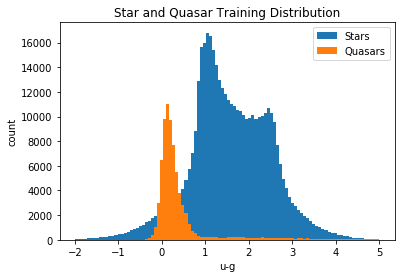

In [606]:
plt.hist(star_train_data['u-g'], bins=100, range=[-2, 5], label='Stars')
plt.hist(quasar_train_data['u-g'], bins=100, range=[-2, 5], label='Quasars')

plt.xlabel('u-g')
plt.ylabel('count')
plt.legend()
plt.title('Star and Quasar Training Distribution')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

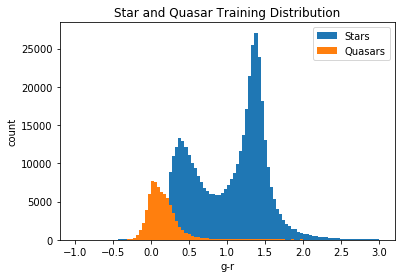

In [607]:
plt.hist(star_train_data['g-r'], bins=100, range=[-1, 3], label='Stars')
plt.hist(quasar_train_data['g-r'], bins=100, range=[-1, 3], label='Quasars')
plt.xlabel('g-r')
plt.ylabel('count')
plt.legend()
plt.title('Star and Quasar Training Distribution')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

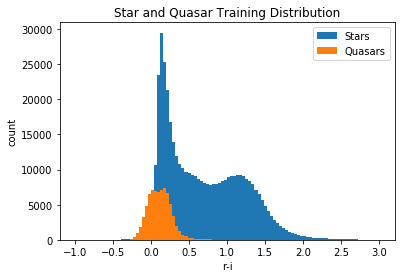

In [608]:
plt.hist(star_train_data['r-i'], bins=100, range=[-1, 3], label='Stars')
plt.hist(quasar_train_data['r-i'], bins=100, range=[-1, 3], label='Quasars')
plt.xlabel('r-i')
plt.ylabel('count')
plt.legend()
plt.title('Star and Quasar Training Distribution')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

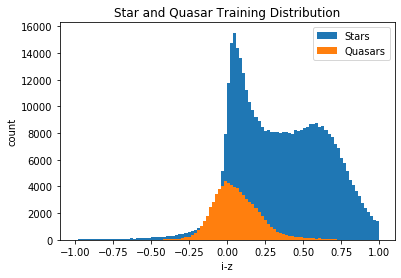

In [609]:
plt.hist(star_train_data['i-z'], bins=100, range=[-1, 1], label='Stars')
plt.hist(quasar_train_data['i-z'], bins=100, range=[-1, 1], label='Quasars')
plt.xlabel('i-z')
plt.ylabel('count')
plt.legend()
plt.title('Star and Quasar Training Distribution')
plt.show

### Testing Data

## Part 2

In [610]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import sklearn.metrics

In [611]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predictions = gnb.predict(X_train)
print("Accuracy: ", accuracy_score(y_train, y_predictions))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_predictions))

Accuracy:  0.7866947693403787
Confusion Matrix: 
 [[329922 100905]
 [  6876  67587]]


In [612]:
y_predictions = gnb.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_predictions))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_predictions))

Accuracy:  0.617245
Confusion Matrix: 
 [[110859  75862]
 [   689  12590]]


## Part 3

Making sure that test data is accurately predicted.

In [613]:
from sklearn.mixture import GaussianMixture

# Stars
c_0 = GaussianMixture(n_components=1, covariance_type='diag')
c_0.fit(X_train[y_train == 0])
c_0_loglikelihood = c_0.score_samples(X_test)
c_0_loglikelihood

array([-3.81634736, -3.75925987, -3.1146205 , ..., -3.7450398 ,
       -5.11544321, -3.7996472 ])

In [614]:
# Quasars
c_1 = GaussianMixture(n_components=1, covariance_type='diag')
c_1.fit(X_train[y_train == 1])
c_1_loglikelihood = c_1.score_samples(X_test)
print(c_1.means_)

[[0.43870024 0.18941125 0.12000176 0.06293191]]


In [615]:
likelihoods = np.array([c_0_loglikelihood, c_1_loglikelihood]).T
likelihood_pred = np.argmax(likelihoods, axis=1)
print('Accuracy: ', accuracy_score(y_test, likelihood_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, likelihood_pred))

Accuracy:  0.59932
Confusion Matrix: 
 [[106972  79749]
 [   387  12892]]


Create validation set by splitting the data

In [616]:
X_train_copy = X_train
y_train_copy = y_train

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8)

#stars
c_0 = GaussianMixture(n_components=1, covariance_type='full')
c_0.fit(X_train[y_train == 0])
c_0_loglikelihood = c_0.score_samples(X_val)

#quasars
c_1 = GaussianMixture(n_components=1, covariance_type='full')
c_1.fit(X_train[y_train == 1])
c_1_loglikelihood = c_1.score_samples(X_val)

likelihoods = np.array([c_0_loglikelihood, c_1_loglikelihood]).T
likelihood_pred = np.argmax(likelihoods, axis=1)
print('Accuracy: ', accuracy_score(y_val, likelihood_pred))
print("Confusion Matrix: \n", confusion_matrix(y_val, likelihood_pred))

Accuracy:  0.731065328821073
Confusion Matrix: 
 [[60090 25982]
 [ 1196 13790]]


In [617]:
#stars
c_0 = GaussianMixture(n_components=3, covariance_type='diag')
c_0.fit(X_train[y_train == 0])
c_0_loglikelihood = c_0.score_samples(X_val)

#quasars
c_1 = GaussianMixture(n_components=3, covariance_type='diag')
c_1.fit(X_train[y_train == 1])
c_1_loglikelihood = c_1.score_samples(X_val)

likelihoods = np.array([c_0_loglikelihood, c_1_loglikelihood]).T
likelihood_pred = np.argmax(likelihoods, axis=1)
print('Accuracy: ', accuracy_score(y_val, likelihood_pred))
print("Confusion Matrix: \n", confusion_matrix(y_val, likelihood_pred))

Accuracy:  0.9572225850501692
Confusion Matrix: 
 [[82870  3202]
 [ 1121 13865]]


In [618]:
#stars
c_0 = GaussianMixture(n_components=2, covariance_type='tied')
c_0.fit(X_train[y_train == 0])
c_0_loglikelihood = c_0.score_samples(X_val)

#quasars
c_1 = GaussianMixture(n_components=2, covariance_type='tied')
c_1.fit(X_train[y_train == 1])
c_1_loglikelihood = c_1.score_samples(X_val)

likelihoods = np.array([c_0_loglikelihood, c_1_loglikelihood]).T
likelihood_pred = np.argmax(likelihoods, axis=1)
print('Accuracy: ', accuracy_score(y_val, likelihood_pred))
print("Confusion Matrix: \n", confusion_matrix(y_val, likelihood_pred))

Accuracy:  0.8644639711848642
Confusion Matrix: 
 [[73701 12371]
 [ 1326 13660]]


In [619]:
#stars
c_0 = GaussianMixture(n_components=2, covariance_type='full')
c_0.fit(X_train[y_train == 0])
c_0_loglikelihood = c_0.score_samples(X_val)

#quasars
c_1 = GaussianMixture(n_components=2, covariance_type='full')
c_1.fit(X_train[y_train == 1])
c_1_loglikelihood = c_1.score_samples(X_val)

likelihoods = np.array([c_0_loglikelihood, c_1_loglikelihood]).T
likelihood_pred = np.argmax(likelihoods, axis=1)
print('Accuracy: ', accuracy_score(y_val, likelihood_pred))
print("Confusion Matrix: \n", confusion_matrix(y_val, likelihood_pred))

Accuracy:  0.960052643036672
Confusion Matrix: 
 [[83474  2598]
 [ 1439 13547]]


In [620]:
#stars
c_0 = GaussianMixture(n_components=2, covariance_type='diag')
c_0.fit(X_train[y_train == 0])
c_0_loglikelihood = c_0.score_samples(X_val)

#quasars
c_1 = GaussianMixture(n_components=2, covariance_type='diag')
c_1.fit(X_train[y_train == 1])
c_1_loglikelihood = c_1.score_samples(X_val)

likelihoods = np.array([c_0_loglikelihood, c_1_loglikelihood]).T
likelihood_pred = np.argmax(likelihoods, axis=1)
print('Accuracy: ', accuracy_score(y_val, likelihood_pred))
print("Confusion Matrix: \n", confusion_matrix(y_val, likelihood_pred))

Accuracy:  0.9454372736448377
Confusion Matrix: 
 [[81762  4310]
 [ 1204 13782]]


Classifying Test Set:

In [621]:
#stars
c_0 = GaussianMixture(n_components=2, covariance_type='diag')
c_0.fit(X_train_copy[y_train_copy == 0])
c_0_loglikelihood = c_0.score_samples(X_test)

#quasars
c_1 = GaussianMixture(n_components=2, covariance_type='diag')
c_1.fit(X_train_copy[y_train_copy == 1])
c_1_loglikelihood = c_1.score_samples(X_test)

likelihoods = np.array([c_0_loglikelihood, c_1_loglikelihood]).T
likelihood_pred = np.argmax(likelihoods, axis=1)
print('Accuracy: ', accuracy_score(y_test, likelihood_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, likelihood_pred))

Accuracy:  0.94445
Confusion Matrix: 
 [[176147  10574]
 [   536  12743]]
